In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df=pd.read_csv('concrete_data.csv')

In [4]:
df.head(3)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [5]:
df.shape

(1030, 9)

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

### Good There are no Null

In [8]:
X=df.drop(columns=['Strength'])
y=df['Strength']

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


# Applying Algorithem

In [11]:
## Regression 
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred=lr.predict(X_test)

In [13]:
y_pred

array([59.65804162, 52.0412113 , 63.53513339, 51.57545676, 17.22001733,
       39.86561321, 26.6982471 , 44.73648869, 29.36619785, 38.18612542,
       27.76438338, 19.81055461, 66.8940356 , 52.28562112, 29.96928612,
       44.45926401, 29.2284856 , 26.53340084, 31.98162681, 32.03208356,
       36.82327256, 31.77175527, 38.07286862, 25.12353728, 33.0993284 ,
       33.85670933, 14.24140345, 40.33250901, 41.88282591, 21.33261142,
       35.71648095, 30.96693001, 43.87446203, 45.52648807, 30.7629146 ,
       29.59299935, 28.90650584, 38.85005738, 20.34631763, 38.45267413,
       21.16537625, 15.88280149, 31.06077771, 50.70684031, 20.26957631,
       57.64501168, 50.90245564, 60.96378987, 20.00393916, 19.22241454,
       40.4816289 , 36.23627397, 30.01525382, 33.42739866, 46.66492833,
       51.47376399, 27.73605695, 15.69651113, 29.69654891, 18.12447629,
       38.63227644, 20.52725493, 31.56412397, 55.48969297, 22.93752175,
       21.34689286, 32.26933604, 16.70816961, 25.40482587, 25.56

In [14]:
r2_score(y_test, y_pred)

0.6275531792314848

In [15]:
## Cross Validation
lr=LinearRegression()
cross_val_score(lr, X, y, scoring='r2')

array([0.33015205, 0.41207076, 0.45175533, 0.60725028, 0.50374183])

In [16]:
np.mean(cross_val_score(lr, X, y, scoring='r2'))

0.4609940491662864

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


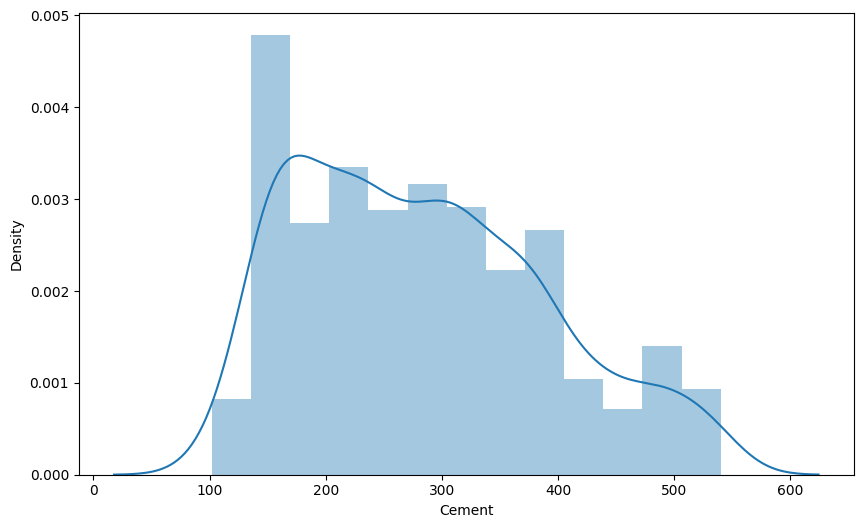

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


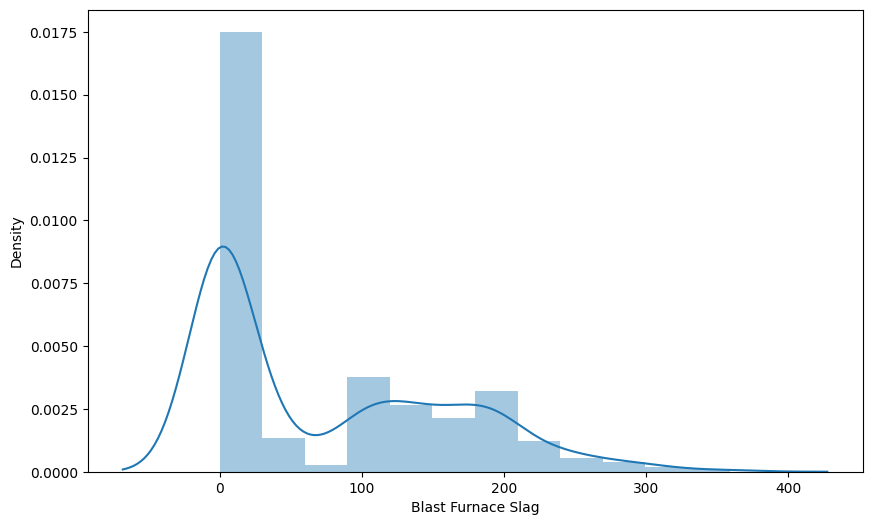

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


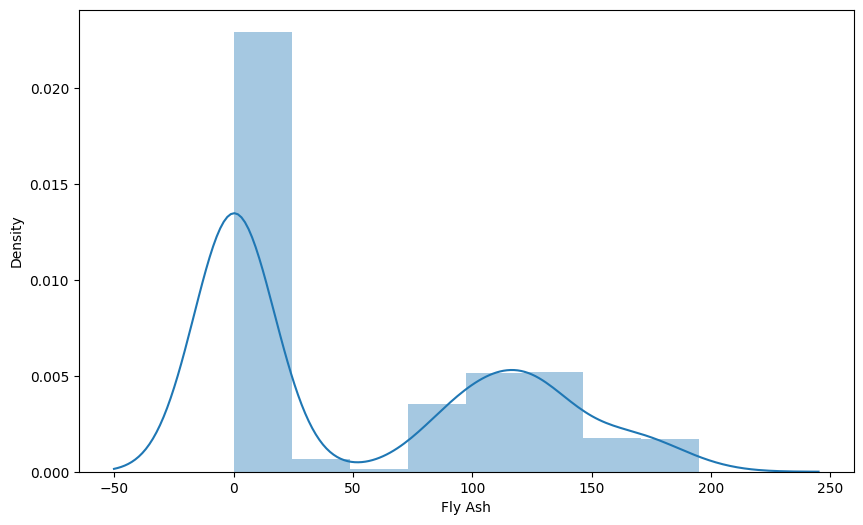

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


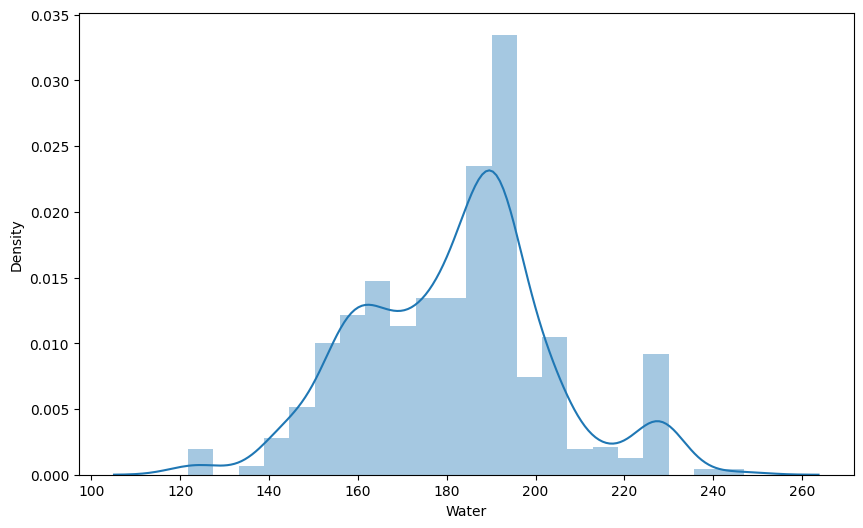

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


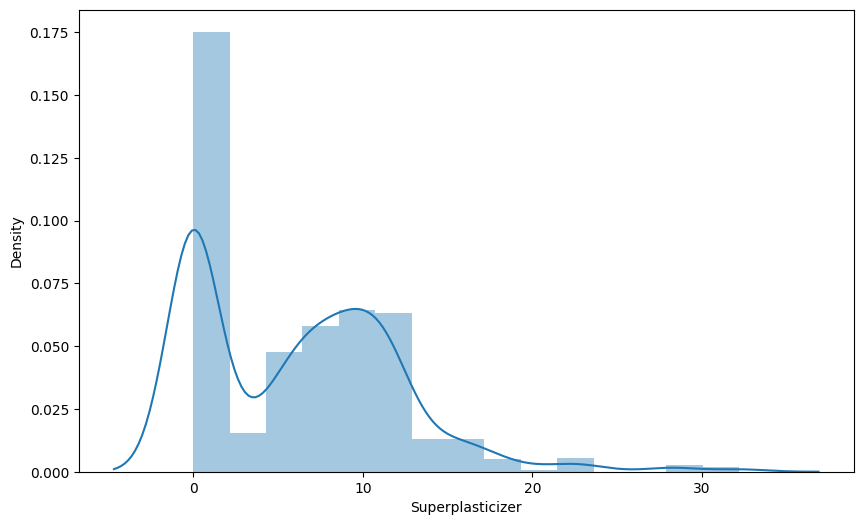

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


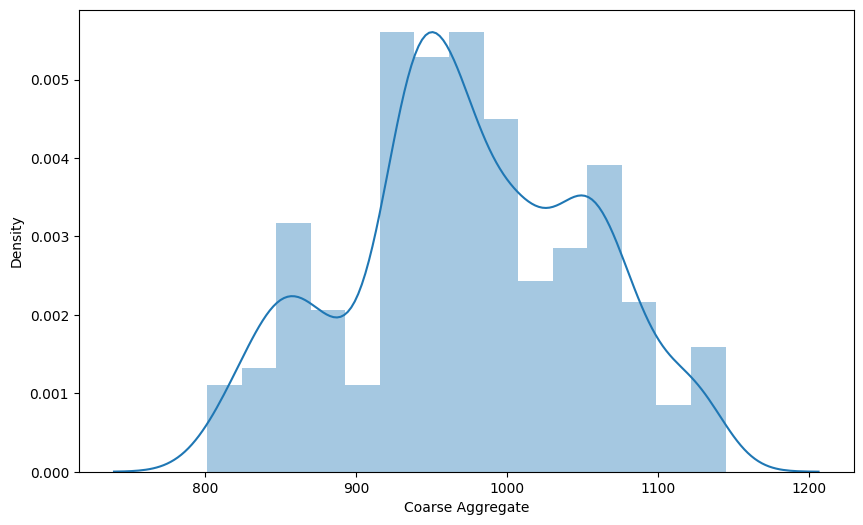

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


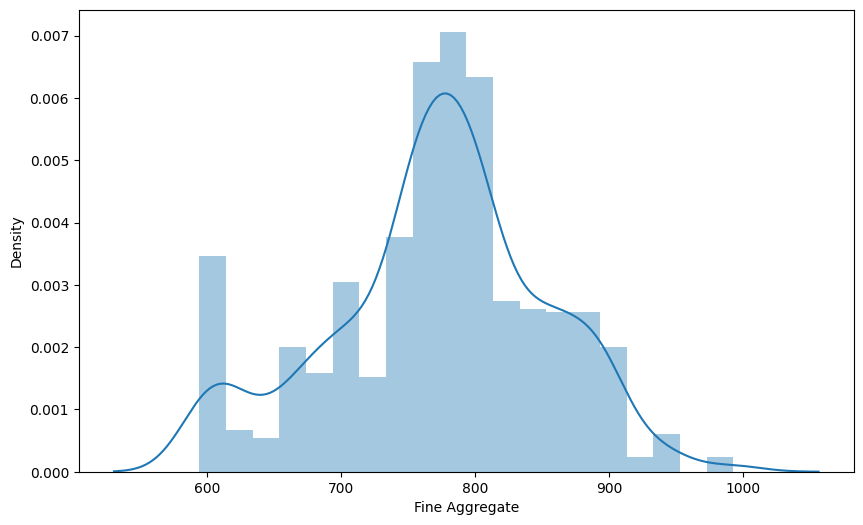

C:\Users\tushe\AppData\Local\Temp\ipykernel_13336\3721805563.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


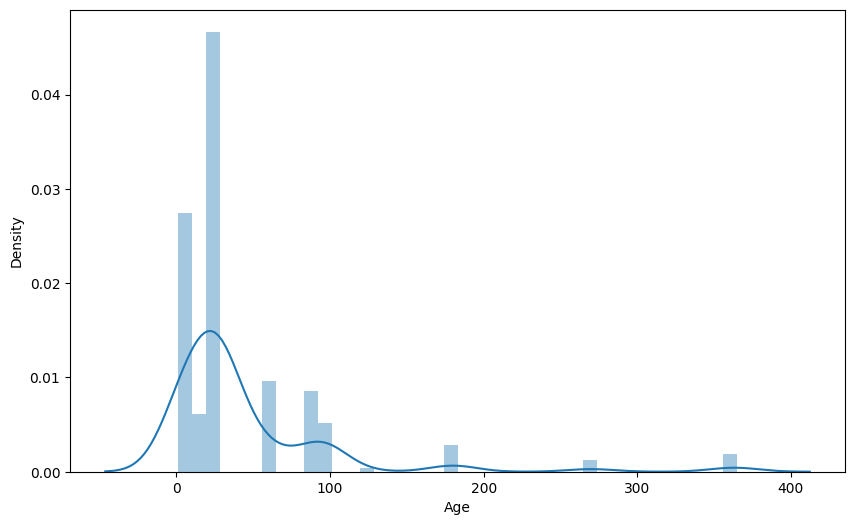

In [17]:
for col in X_train.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(X_train[col])
    plt.show()

### Box-Cox Transform

In [18]:
pt=PowerTransformer(method='box-cox')
X_train_transform=pt.fit_transform(X_train+0.00001) #add 0.00001 bcz box-cox not allow 0 or -ve number
X_test_transform=pt.transform(X_test+0.00001)

In [19]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772682
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [20]:
lr=LinearRegression()
lr.fit(X_train_transform, y_train)
y_pred2=lr.predict(X_test_transform)
r2_score(y_test, y_pred2)

0.8054599377211109

In [21]:
## Cross val Score
X_transform=pt.fit_transform(X+0.000001)
lr=LinearRegression()
np.mean(cross_val_score(lr, X_transform, y, scoring='r2'))

0.6662950327869239

## Yeo-Johnson

In [29]:
pt1 = PowerTransformer()

X_train_transformedYeo = pt1.fit_transform(X_train)
X_test_transformedYeo = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformedYeo,y_train)

y_predYeo = lr.predict(X_test_transformedYeo)

print(r2_score(y_test,y_predYeo))

0.8161906513339304


In [30]:
## Cross val score

pt = PowerTransformer()
X_transformedYeo = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformedYeo,y,scoring='r2'))

0.6834625134285748